# Content

April, 2019

 1. https://python-forum.io/Thread-iterator-from-an-iterator
 

1. Decoration of iterables

In [6]:
x = [1,2,3]
class IterDecor:
    def __iter__(self):
        return self

    def __next__(self):
        value = next(self._iterator)
        return str(value * value)
    
    def __call__(self, iterator):
        self._iterator = iterator
        return self

c = IterDecor()

x = c(iter(x))

for z in x:
    print(z, type(z))
    

1 <class 'str'>
4 <class 'str'>
9 <class 'str'>


#2. https://python-forum.io/Thread-Issues-with-matplotlib-pyplot

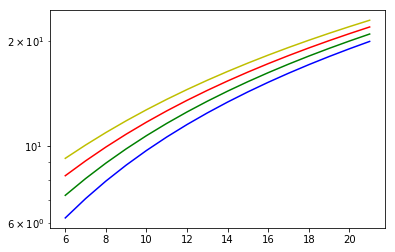

In [7]:
import numpy as np
from matplotlib import pyplot as plt
xvalues = np.linspace(6, 21, 16) 

@np.vectorize
def ln(x, y):
    return x + y


def error(j, xvalues):
    return  abs(ln(xvalues, j) - np.log(xvalues))

for j, c in zip(range(2, 6), 'bgry'):
    plt.semilogy(xvalues, error(j, xvalues), color=c)
plt.show()

#2. https://python-forum.io/Thread-this-weekend-s-python-class-assignment

In [102]:
from itertools import accumulate
def decompose(a, base=2):
    """Decompose the number by powers of specified base. 
    
    4672 = 2**12 + 2**9 + 2**6 (base = 2)
    """
    res = list()
    def _recursion(a, res=res):
        if a % base != 0:
            raise Exception("Couldn't decompose the number.")
        ind = 0
        while a % base == 0:
            a = a / base 
            ind += 1
        if ind:
            res.append(ind)
        if a == 1:
            return list(accumulate(res))
        if a > 1:
            a -= 1
            _recursion(a, res=res)
    _recursion(a)
    return list(accumulate(res))

In [103]:
decompose(1089,3)

[2, 3, 4, 5, 6]

#3. https://python-forum.io/Thread-Determining-Beta-distribution-parameters-alpha-beta-using-CDF
Fitting Beta(a, b) distribution

In [31]:
from scipy.stats import beta
import numpy as np


In [35]:
from scipy.optimize import minimize

def loss_func(x, point1=(20, 0.2), point2=(50, 0.5)):
    a, b = x[0], x[1]
    return (beta.cdf(point1[0], a, b, scale=100) - point1[-1])**2 +(beta.cdf(point2[0], a, b, scale=100) - point2[-1])**2 
    

minimize(loss_func, x0=np.array([0.5, 0.5]))
    

      fun: 2.470038645013013e-12
 hess_inv: array([[30.76256164, 35.8030502 ],
       [35.8030502 , 44.63868523]])
      jac: array([-1.37334002e-06,  1.21964805e-06])
  message: 'Optimization terminated successfully.'
     nfev: 56
      nit: 11
     njev: 14
   status: 0
  success: True
        x: array([1.00000141, 1.00000565])

In [41]:

x = np.linspace(0, 1000, 100)
a, b  = 1.00000141, 1.00000565
plt.plot(x, beta.cdf(x, a, b, scale=100), 'r-', lw=5, alpha=0.6, label='beta pdf')


In [45]:
beta.cdf(20, a, b, scale=100)

0.20000055474589082

#4. https://python-forum.io/Thread-3D-Plotting-in-Matplotlib-for-Python

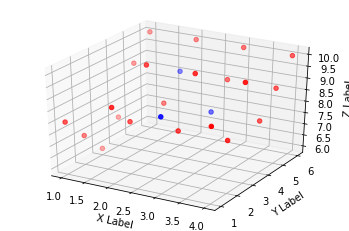

In [48]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
 
 
 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
 
z = [8,7,6,7,9,10,9,8,10,8,9,10,9,8,10,8,9,10,9,8,10,8,9,10]
x = [1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4]
y = [1,2,3,4,5,6,1,2,3,4,5,6,1,2,3,4,5,6,1,2,3,4,5,6]
 
    
colored_inds = [10, 12, 15]  # points #10, 12 and 15 will be blue.
colors = ['r' if j not in colored_inds else 'b' for j in range(len(x))]
ax.scatter(x, y, z, c=colors, marker='o')
     
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
 
plt.show()

#5. https://python-forum.io/Thread-Automate-the-boring-stuff-regex-not-matching

In [14]:
import re
x = 'my numbers are 415-555-1234, 555-4242, 212-555-0000'
phoneRegex = re.compile(r'((?:\d\d\d-)?\d\d\d-\d\d\d\d)')

In [15]:
phoneRegex.findall(x)

['415-555-1234', '555-4242', '212-555-0000']

#6. https://python-forum.io/Thread-Python-to-iterate-a-number-of-possible-combinations

In [75]:
data = [(x, 'message #{}'.format(x)) for x in range(2 ** 10)] #  [(key, value), ...] #kv-store, simple model 

In [ ]:
Ok, we have a database presented by a list of tuples (key, value); That database could include multiple keys, 
e.g. data = [(key1, val1), (key1, val2), (key1, val3), (key2, val7)....]

You can choose another model of the db, or use external db solution. This is a simple model of a database.

Lets a user have selected some checkboxes, e.g. `(0,0,0,0,0,0,1,0,1,0)`, this could be converted to some
binary value `0b0000001010` that coincedes to 10 (in decimal number system). So, we could treat that 
any particular checkbox selection is already presented in binary form.

Now we need to make a query to our database. There are two general form of queries could be done here: 
    1) find records, where at least one checkbox is the same, as in the database; 
    2) find records, where all selected (unselected) checkboxes are the that, as in the database;

In [87]:
How to compare two keys (checkbox selection and record key)?

To check full equality, it is sufficient to use comparison operator `==`.
0b0000001010 == 0b0000000101 => False
0b0000001010 == 0b0000001010 => True  # all checkboxes should be the same, as in the db

If we need to perform comparison by "at least one checkbox equal" scheme, we can
use bitwise `and` operator. 



0

In [89]:
bool(0b0000001010 & 0b0000000010)

True

In [90]:
bool(0b0000001010 & 0b1100000000)

False

In [83]:
user_selected_checkboxes = 0b0000000100  # selection mask = (0,0,0,0,0,0,1,0,1,0); 1 - checkbox is selected
print(user_selected_checkboxes) # get decimal reperesentation of selection mask

4


In [84]:
at_least_one_criteria_met = [v for k, v in data if k & user_selected_checkboxes]

In [78]:
len(at_least_one_criteria_met)

512

In [80]:
all_criteria_met = [v for k, v in data if k == user_selected_checkboxes]

In [81]:
all_criteria_met

['message #1']

In [ ]:
You still need to adopt this for your needs. Note: searching in this cases has O(N) as
complexity estimation (you need to check all elements in the db). This might be inappropriate in case of millions 
records or more. 

#7. https://python-forum.io/Thread-Same-line-length-in-slope-fields

In [33]:
from pylab import plt, np
def f(x,y):
    return -y/x

line_len = 0.2

for m in [i for i in range(-4,5) if i!=0]:
    for n in [i for i in range(-4,5) if i!=0]:
        slope=f(m/2,n/2)
        slope = np.arctan(slope)
        plt.plot([m/2,m/2+line_len*np.cos(slope)],[n/2,line_len*np.sin(slope)+n/2],color='k')
        plt.ylim(-2,2,1/2)
        plt.xlim(-2,2,1/2)
        plt.grid(True)

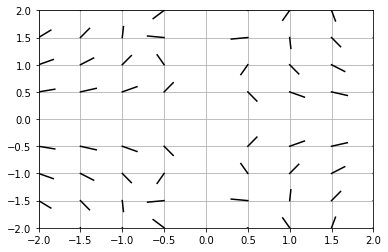

In [34]:
plt.show()

In [35]:
np.arc

AttributeError: module 'numpy' has no attribute 'arc'